Using Facebook's Prophet Library to Forecast Canadian Natural Gas Production

In this example, we will try to adopt a pure data-based approach to forecast Canada's natural gas production using Facebook's Prophet library. The idea of this post is to use a univariate time-series dataset and produce a best-fit model that allows us to confidently predict future production. The model will allow us to forecast the production for the next 10 years i.e. until 2030.

Importing Data and Libraries

We will begin by importing various libraries in Python such as fbprophet, numpy, pandas, seaborn, plotly and matplotlib. Please make sure you install these libraries before running the program. The Jupyter notebook and CSV file can be found on my github page.

In [7]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Next, we will import Canadian natural gas production data from Canada Energy regulator website, load that data into a pandas dataframe 'data'.

In [8]:
data = pd.read_excel("Canada Gas Production.xlsx")
# Check the first 5 elements of the dataframe
data.head()

,Date,Canada Total
0,2000-01-01,463099.443872
1,2000-02-01,470450.163903
2,2000-03-01,474403.344451
3,2000-04-01,481287.270316
4,2000-05-01,472605.363725


In [9]:
# Check if the the data is set up in proper format and then start modeling/forecasting. 
data.dtypes

Date            datetime64[ns]
Canada Total           float64
dtype: object

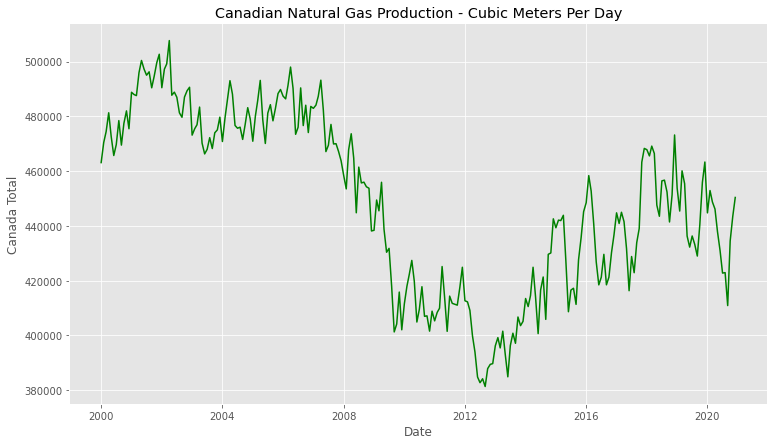

In [11]:
#Visualize the dataframe i.e. Canadian total production in BPD 
plt.figure(figsize=(12.5,7))
sns.lineplot(data=data, x="Date", y="Canada Total", color='green')
plt.title("Canadian Natural Gas Production - Cubic Meters Per Day")
plt.grid(True)
plt.show()

Prophet expects that the format of the dataframe to be specific. The model expects a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

In [12]:
data.columns = ["ds","y"]
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now its time to start forecasting. With Prophet, we start by building some future time data with the following command:

In [6]:
future = model.make_future_dataframe(periods= 120, freq='m')

In this line of code, we created a pandas dataframe with 120 (periods = 120) future data points with a monthly frequency (freq = ‘m’). In the next line of code, we check the last five dates of the forecasted data.

In [23]:
future.tail()

,ds
367,2030-07-31
368,2030-08-31
369,2030-09-30
370,2030-10-31
371,2030-11-30


Now, we will try to predict the actual values using Prophet library and check the last five elements of the forecast.

In [24]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
367,2030-07-31,464377.550182,381297.119135,552132.599271,383709.376125,552860.143620,-1617.927455,-1617.927455,-1617.927455,-1617.927455,-1617.927455,-1617.927455,0.0,0.0,0.0,462759.622727
368,2030-08-31,464537.297369,376413.529137,545716.600314,383131.266754,553496.265140,-8089.126723,-8089.126723,-8089.126723,-8089.126723,-8089.126723,-8089.126723,0.0,0.0,0.0,456448.170646
369,2030-09-30,464691.891421,376959.710640,551922.297715,382321.966666,554538.042288,-2740.152689,-2740.152689,-2740.152689,-2740.152689,-2740.152689,-2740.152689,0.0,0.0,0.0,461951.738732
370,2030-10-31,464851.638608,382067.706696,558224.835623,381448.786140,555768.646986,510.428742,510.428742,510.428742,510.428742,510.428742,510.428742,0.0,0.0,0.0,465362.067350
371,2030-11-30,465006.232660,400040.248099,578800.461861,380602.208063,557245.084359,19824.166673,19824.166673,19824.166673,19824.166673,19824.166673,19824.166673,0.0,0.0,0.0,484830.399333


If we take a look at the data using .tail(), we notice there are a bunch of columns in the forecast dataframe. The important ones (for now) are ‘ds’ (datetime), ‘yhat’ (forecast), ‘yhat_lower’ and ‘yhat_upper’ (uncertainty levels).

In [25]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,477621.456784,466613.225887,489375.347829
1,2000-02-01,481403.133892,468896.942426,493397.591773
2,2000-03-01,486011.365885,473568.264814,498406.557396
3,2000-04-01,487465.767380,474956.159419,499288.778273
4,2000-05-01,480183.580841,467874.720337,493331.374450


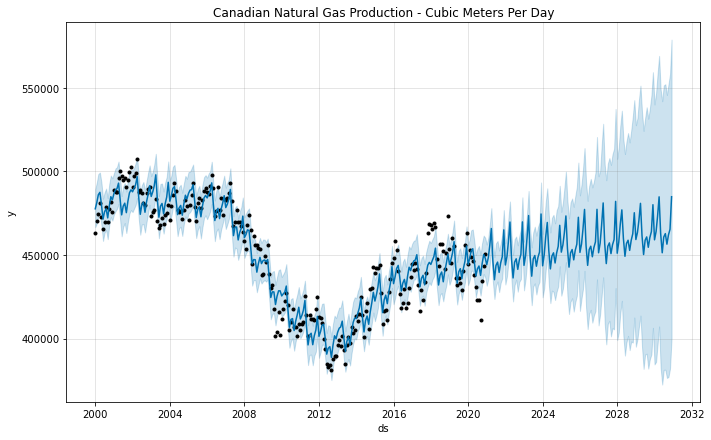

In [26]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("Canadian Natural Gas Production - Cubic Meters Per Day")
plt.show()

Next, we will check the model robustness using the best metrics for measuring accuracy of this model. Utilizing a combination of R-Squared, Mean Squared Error and Mean Absolute Error will help us to gauge the quality of our model. We will Python's Scikit-Learn library to quickly calculate these metrics.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = data['y'].values
y_pred = forecast['yhat'][:252].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.3f' % r)

MAE: 7782.412
R-squared Score: 0.911


For the Canadian natural gas time-series data, the Prophet model gives an R-squared value of 0.91 i.e. 91% of variance in our data set is explained by the model. The MAE is calculated to be 7782 i.e. for each data point, the average magnitude error is roughly 7782 Cubic Meters Per Day, which isn't bad at all when we consider that our production value is in hundreds of thousands of Cubic Meters Per Day. 

Finally, we create a plot to compare actual vs. predicted values to give a clear understanding of how our model visually looks against the existing Canadian natural gas production dataset.

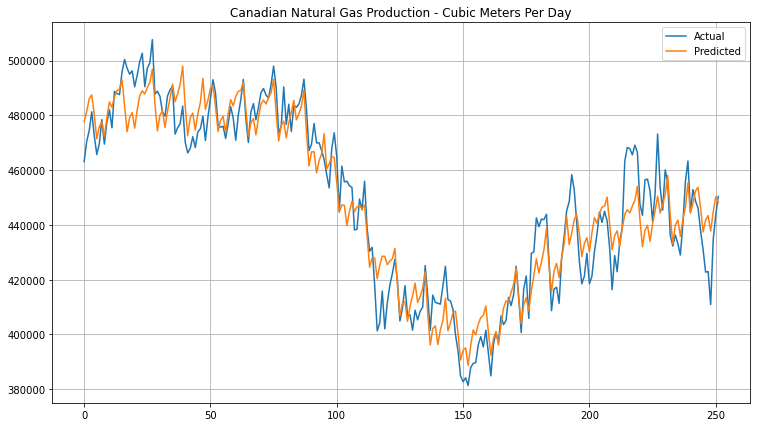

In [29]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Canadian Natural Gas Production - Cubic Meters Per Day")
plt.grid(True)
plt.legend()
plt.show()